In [13]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

playlist_files = [
    '/content/cleaned_CLASSICALSS.csv',
    '/content/cleaned_FUNKSS.csv',
    '/content/cleaned_HIPHOPSS.csv',
    '/content/cleaned_INDIESS.csv',
    '/content/cleaned_JAZZSS.csv',
    '/content/cleaned_METALSS.csv',
    '/content/cleaned_POPSS.csv',
    '/content/cleaned_ROCKSS.csv'
]

def read_data(files):
    data_list = []
    for file in files:
        try:
            data = pd.read_csv(file)
            data_list.append(data)
        except Exception as e:
            print(f"Error reading {file}: {str(e)}")
    if data_list:
        return pd.concat(data_list, ignore_index=True)
    else:
        return None

def find_similar_songs(all_data, user_input):
    selected_columns = ['Popularity', 'Energy', 'Acousticness', 'Instrumentalness']
    data_subset = all_data[selected_columns].dropna()

    #cosine similarity
    similarities = cosine_similarity(data_subset, data_subset)

    index = all_data[all_data['Track Name'].str.lower() == user_input.lower()].index

    if not index.empty:
        index = index[0]
        sim_scores = list(enumerate(similarities[index]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        top_similar = sim_scores[1:12]
        similar_indices = [i[0] for i in top_similar]
        similar_songs = all_data.iloc[similar_indices].drop_duplicates(subset=['Track Name']).head(10)

        return similar_songs[['Track Name', 'Genres']].reset_index(drop=True)
    else:
        print("Song not found in the dataset.")
        return None

all_data = read_data(playlist_files)

if all_data is not None:
    user_song = input("Enter a song title: ")

    recommended_songs = find_similar_songs(all_data, user_song)

    if recommended_songs is not None:
        print("\nTop 10 Recommended Songs based on Similarity:")
        print("-" * 40)
        for i, row in recommended_songs.iterrows():
            print(f"{i + 1}. {row['Track Name']}")
        print("-" * 40)
    else:
        print("No similar songs found.")
else:
    print("No valid data found in the provided files.")


Enter a song title: calm

Top 10 Recommended Songs based on Similarity:
----------------------------------------
1. Cradle To The Grave
2. All I Do Is Win (feat. T-Pain, Ludacris, Snoop Dogg & Rick Ross)
3. Trains To Brazil
4. A Ghost In The Trenches
5. Dalinda - English Version
6. Close To Me
7. The Final Solution
8. Sky High
9. Little Red Radio
10. Rock You Like A Hurricane
----------------------------------------


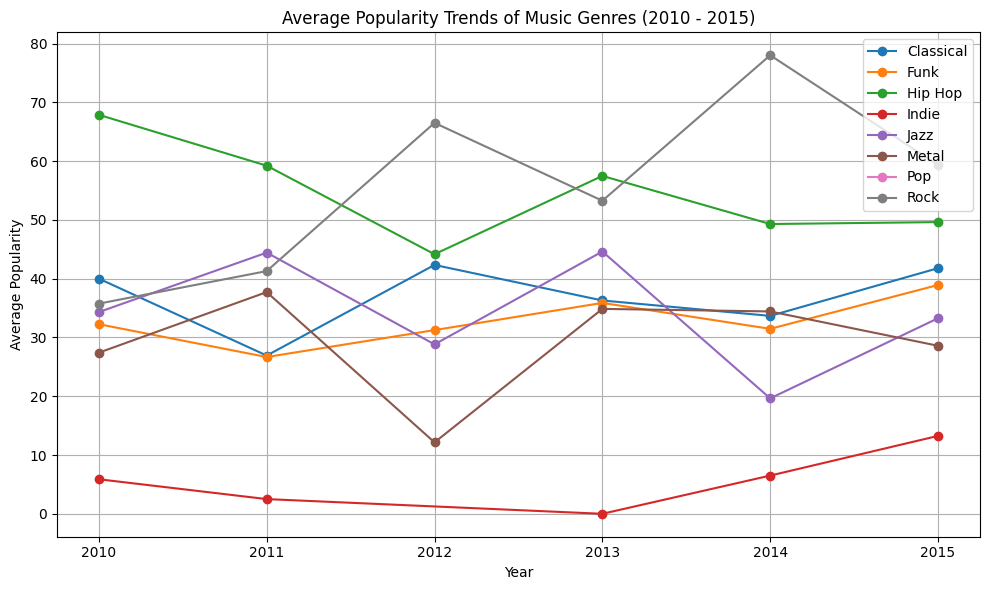

In [28]:
#temporal analysis for popularity over 5 years of span

import pandas as pd
import matplotlib.pyplot as plt

playlist_files = {
    'Classical': '/content/cleaned_CLASSICALSS.csv',
    'Funk': '/content/cleaned_FUNKSS.csv',
    'Hip Hop': '/content/cleaned_HIPHOPSS.csv',
    'Indie': '/content/cleaned_INDIESS.csv',
    'Jazz': '/content/cleaned_JAZZSS.csv',
    'Metal': '/content/cleaned_METALSS.csv',
    'Pop': '/content/cleaned_POPSS.csv',
    'Rock': '/content/cleaned_ROCKSS.csv'
}

start_date = '2010'
end_date = '2015'

plt.figure(figsize=(10, 6))

for genre, file in playlist_files.items():
    try:
        df = pd.read_csv(file, parse_dates=['Release Date'])
        filtered = df[(df['Release Date'].dt.year >= int(start_date)) & (df['Release Date'].dt.year <= int(end_date))]
        popularity_mean = filtered.groupby(filtered['Release Date'].dt.year)['Popularity'].mean()
        popularity_mean.index = popularity_mean.index.astype(int)
        plt.plot(popularity_mean.index, popularity_mean.values, label=genre, marker='o')
    except Exception as e:
        print(f"Error reading {file}: {str(e)}")

plt.title('Average Popularity Trends of Music Genres (2010 - 2015)')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


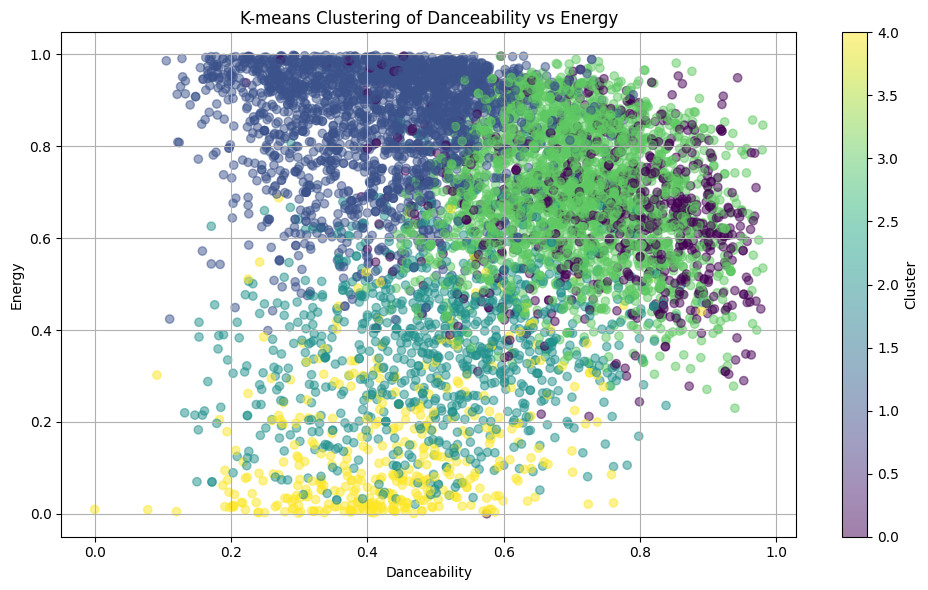

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read data from CSV files
playlist_files = [
    '/content/cleaned_CLASSICALSS.csv',
    '/content/cleaned_FUNKSS.csv',
    '/content/cleaned_HIPHOPSS.csv',
    '/content/cleaned_INDIESS.csv',
    '/content/cleaned_JAZZSS.csv',
    '/content/cleaned_METALSS.csv',
    '/content/cleaned_POPSS.csv',
    '/content/cleaned_ROCKSS.csv'
]

# Columns to be used for clustering
columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness']

# Read data from all files and concatenate into one DataFrame
all_data = pd.concat([pd.read_csv(file)[columns] for file in playlist_files])

all_data.dropna(inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(all_data)

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)


# Add cluster labels to the DataFrame
all_data['Cluster'] = cluster_labels

# Scatter plot for two features
plt.figure(figsize=(10, 6))
plt.scatter(all_data['Danceability'], all_data['Energy'], c=all_data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('K-means Clustering of Danceability vs Energy')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
